In [148]:
#Andrew Kling
#UNCC HW#5 - Visualization of ride sharing data

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['lines.markeredgewidth'] = 1

In [149]:
#import data into dataframes
city_df = pd.read_csv(os.path.join("raw_data","city_data.csv"))
ride_df = pd.read_csv(os.path.join("raw_data","ride_data.csv"))
#merge two dataframes into one
data_df = ride_df.merge(city_df, how='left',on="city")
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [150]:
#get total number of riders per city and reformat dataframe
total_rides = pd.DataFrame(data_df["city"].value_counts())
total_rides = total_rides.reset_index()
total_rides = total_rides.rename(index=str, columns={"index": "city", "city": "total_rides"})

#get average fare per city and reformat dataframe
avg_fare = pd.DataFrame(data_df.groupby(["city"])["fare"].mean())
avg_fare = avg_fare.reset_index()
avg_fare = avg_fare.rename(index=str, columns={"fare":"avg_fare"})

#merge all data for bubble chart into one dataframe
plot_df = city_df.merge(total_rides, how='left',on='city')
plot_df = plot_df.merge(avg_fare, how='left',on='city')

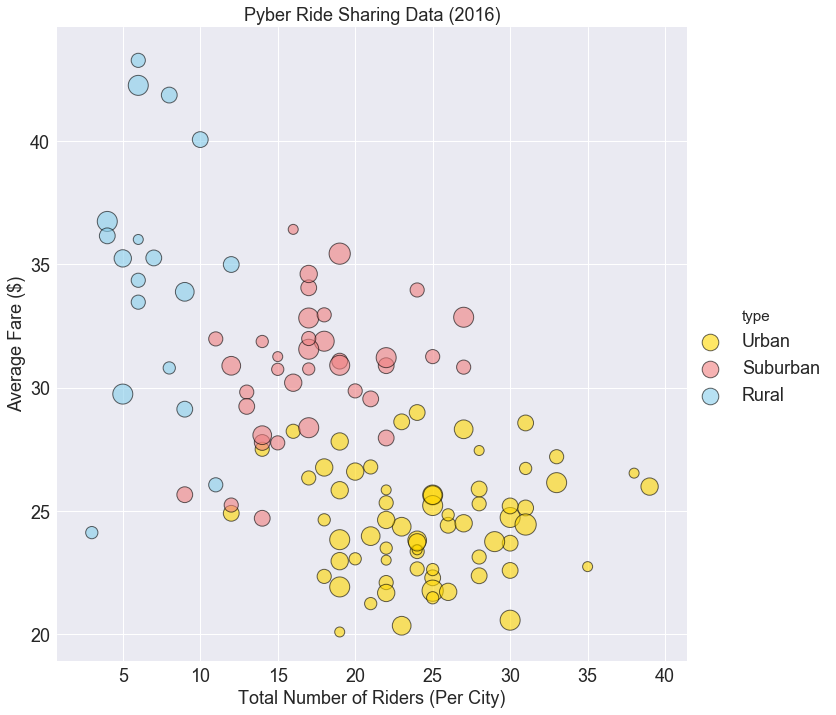

In [152]:
sizes = [100,150,200,250,300,350,400,450]
marker_size = pd.cut(plot_df["driver_count"], [0,10,20,30,40,50,60,70,80],labels=sizes)

sns.lmplot("total_rides","avg_fare",data=plot_df,palette={"Urban":"gold","Suburban":"lightcoral","Rural":"skyblue"},hue='type',
           legend_out=True,fit_reg=False,scatter_kws={'s':marker_size,'alpha':0.6,'edgecolor':'k'},size=10)

plt.rc('font',size=18)
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('figure', titlesize=18)  # fontsize of the figure title


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.show()

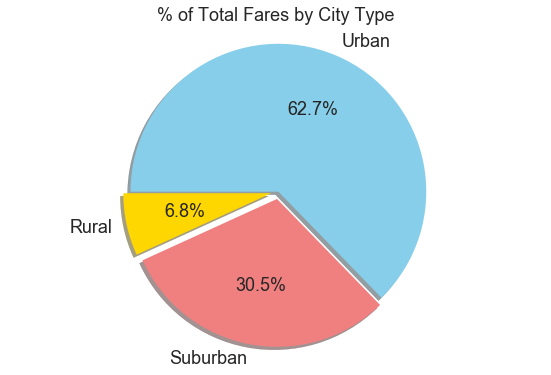

In [141]:
total_fares = data_df["fare"].sum()
fares_by_type = data_df.groupby(["type"])["fare"].sum()
fares_by_type = pd.DataFrame(fares_by_type / total_fares * 100)
fares_by_type = fares_by_type.reset_index()
fares_by_type = fares_by_type.rename(index=str, columns={"fare":"Percentage of Fares"})

plt.pie(fares_by_type["Percentage of Fares"],explode=[.05,.05,0], colors=["gold","lightcoral","skyblue"],
        labels=fares_by_type["type"], autopct='%1.1f%%',shadow=True,startangle=180)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.tight_layout()
plt.show()

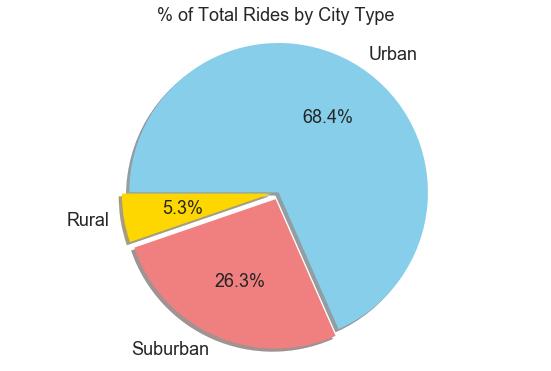

In [140]:
total_rides = data_df["ride_id"].count()
rides_by_type = data_df.groupby(["type"])["ride_id"].count()
rides_by_type = pd.DataFrame(rides_by_type / total_rides * 100)
rides_by_type = rides_by_type.reset_index()
rides_by_type = rides_by_type.rename(index=str, columns={"ride_id":"Percentage of Rides"})

plt.pie(rides_by_type["Percentage of Rides"],explode=[.05,.05,0], colors=["gold","lightcoral","skyblue"],
        labels=rides_by_type["type"], autopct='%1.1f%%',shadow=True,startangle=180)
plt.title("% of Total Rides by City Type")
plt.axis('equal')
plt.tight_layout()
plt.show()

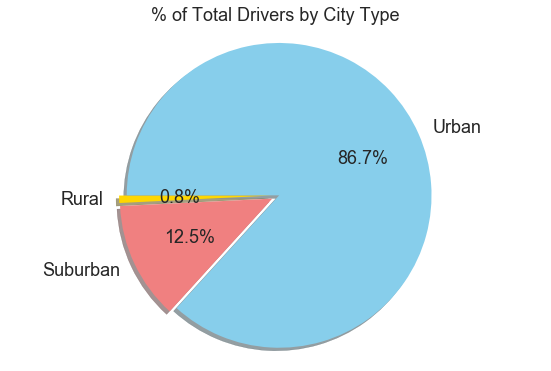

In [139]:
total_drivers = data_df["driver_count"].sum()
drivers_grouped = data_df.groupby(["type"])["driver_count"].sum()
drivers_grouped = pd.DataFrame(drivers_grouped / total_drivers * 100)
drivers_grouped = drivers_grouped.reset_index()
drivers_grouped = drivers_grouped.rename(index=str, columns={"driver_count":"Percentage of Drivers"})

plt.pie(drivers_grouped["Percentage of Drivers"],explode=[.05,.05,0], colors=["gold","lightcoral","skyblue"],
        labels=fares_by_city["type"], autopct='%1.1f%%',shadow=True,startangle=180)
plt.title("% of Total Drivers by City Type")
plt.axis('equal')
plt.tight_layout()
plt.show()